# Quelques expérimentation de simulation probabiliste

Nous allons faire ensemble quelques expérimentations pour nous faire la main.

Importons d'abord les modules `random` et `numpy.random`, ainsi que `numpy` et `matplotlib`

In [1]:
import random as rd
import numpy.random as npr
import matplotlib.pyplot as plt
import numpy as np

## Tirage d'entiers équiprobables entre 1 et 6

On veut simuler le tirage de N dés équilibrés, et afficher les fréquences d'apparition des différentes faces.

Commençons par utiliser le module `random` et effectuons une boucle simulant les N tirages :

In [2]:
def lancer_des(N):
    compteurs = [0]*6
    for k in range(1000000):
        i = rd.randint(1,6)
        compteurs[i-1] += 1
        frequences = [x/N for x in compteurs]
    plt.bar(range(1,7),frequences)

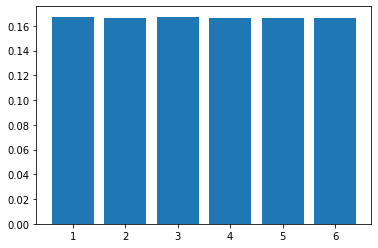

In [3]:
lancer_des(1000000)

Utilisons maintenant `numpy` :

In [4]:
def lancer_des_numpy(N):
    x = npr.randint(1,7,N)
    compteurs = [np.count_nonzero(x == i) for i in range(1,7)]
    frequences = [x/N for x in compteurs]
    plt.bar(range(1,7),frequences)


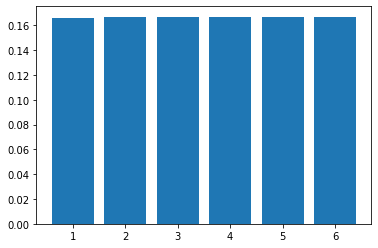

In [5]:
lancer_des_numpy(1000000)

## La loi de Bernoulli de paramètre $p$

Une variable aléatoire suit la loi de Bernoulli de paramètre $p$ si elle vaut 1 avec probabilité $p$ et 0 avec probabilité $1-p$.

On tire un nombre aléatoire uniforme dans $x\in [0,1]$, et la variable aléatoire vaut 1 si $x<p$ et 0 sinon.

Programmons ceci en faisant une boucle python :

In [6]:
def bernoulli(p,N):
    """
    Fabrique un tableau numpy de taille N, contenant N tirages de 
    Bernoulli de paramètre p
    """
    x = npr.rand(N)
    for i in range(N):
        if x[i] < p:
            x[i] = 1
        else:
            x[i] = 0
    return x

Une petite astuce : si $X$ suit une loi uniforme sur $[0,1]$, alors la partie entière $\lfloor p+X \rfloor$ suit la loi de Bernoulli de paramètre $p$.

Ceci permet d'utiliser facilement `numpy` :

In [7]:
def bernoulli2(p,N):
    x = npr.rand(N)
    return np.floor(p+x)

On a appris que  l'espérance et la variance de la loi binomiale valent respectivement $p$ et $p(1-p)$. 

Vérifions-le en calculant la moyenne emprique et la variance empirique d'un grand échantillon :

In [8]:
p = 1/3
N = 10000000
x = bernoulli2(p,N)
print("Moyenne :", np.mean(x))  # on attend 1/3
print("Variance :", np.var(x))  # on attend 2/9

Moyenne : 0.3332621
Variance : 0.22219847270359


## La loi de Gauss ou loi normale

In [9]:
x = npr.normal(0,1,100000)

L'histogramme normé (option `denisty = True`) de répartitition de ce vecteur Gaussien

(array([5.37907168e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.61372150e-04, 3.76535018e-04, 3.22744301e-04, 1.12960505e-03,
        1.72130294e-03, 3.81914089e-03, 5.32528096e-03, 1.08119341e-02,
        1.57068893e-02, 2.47437297e-02, 3.95899676e-02, 5.67492062e-02,
        7.83192836e-02, 1.08388294e-01, 1.49914728e-01, 1.92678348e-01,
        2.28502965e-01, 2.74225074e-01, 3.19032741e-01, 3.50177566e-01,
        3.75405412e-01, 3.96007257e-01, 3.95469350e-01, 3.88691720e-01,
        3.64916223e-01, 3.22582929e-01, 2.83423287e-01, 2.47222134e-01,
        1.95314093e-01, 1.56477195e-01, 1.23395904e-01, 8.53658675e-02,
        6.38495808e-02, 4.50766207e-02, 2.95311035e-02, 1.74819830e-02,
        1.14036320e-02, 6.72383960e-03, 4.24946663e-03, 1.88267509e-03,
        1.12960505e-03, 9.14442185e-04, 4.30325734e-04, 5.37907168e-05,
        1.61372150e-04, 1.61372150e-04]),
 array([-4.85844257, -4.67253689, -4.4866312 , -4.30072552, -4.11481983,
        -3.92891415, 

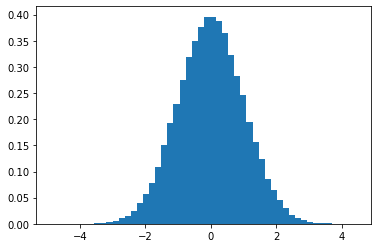

In [10]:
plt.hist(x,50,density=True)

L'histogramme cumulatife (option `cumulative = True`). On trouve la fonction de répartition de la loi de probabilités.

(array([1.0000e-05, 1.0000e-05, 1.0000e-05, 1.0000e-05, 4.0000e-05,
        1.1000e-04, 1.7000e-04, 3.8000e-04, 7.0000e-04, 1.4100e-03,
        2.4000e-03, 4.4100e-03, 7.3300e-03, 1.1930e-02, 1.9290e-02,
        2.9840e-02, 4.4400e-02, 6.4550e-02, 9.2420e-02, 1.2824e-01,
        1.7072e-01, 2.2170e-01, 2.8101e-01, 3.4611e-01, 4.1590e-01,
        4.8952e-01, 5.6304e-01, 6.3530e-01, 7.0314e-01, 7.6311e-01,
        8.1580e-01, 8.6176e-01, 8.9807e-01, 9.2716e-01, 9.5010e-01,
        9.6597e-01, 9.7784e-01, 9.8622e-01, 9.9171e-01, 9.9496e-01,
        9.9708e-01, 9.9833e-01, 9.9912e-01, 9.9947e-01, 9.9968e-01,
        9.9985e-01, 9.9993e-01, 9.9994e-01, 9.9997e-01, 1.0000e+00]),
 array([-4.85844257, -4.67253689, -4.4866312 , -4.30072552, -4.11481983,
        -3.92891415, -3.74300847, -3.55710278, -3.3711971 , -3.18529141,
        -2.99938573, -2.81348005, -2.62757436, -2.44166868, -2.25576299,
        -2.06985731, -1.88395162, -1.69804594, -1.51214026, -1.32623457,
        -1.14032889, -0.95

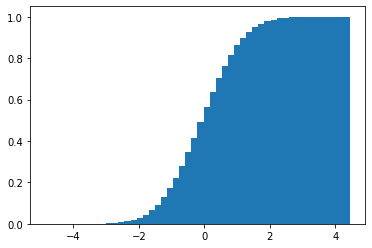

In [11]:
plt.hist(x,50,cumulative=True,density=True)